In [38]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

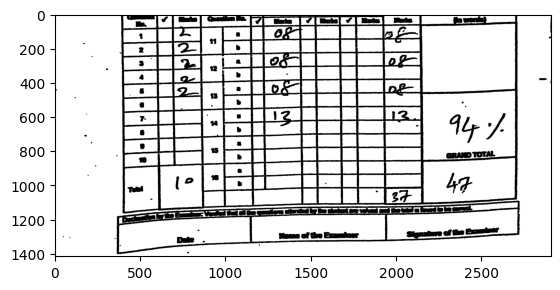

In [39]:
img_for_box_extraction_path = r"images/sheet/1.jpg"  
cropped_dir_path = r"images/sheet/table/" 

img = cv2.imread(img_for_box_extraction_path, 0)
if img is not None:
    
   
    (thresh, img_bin) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    if img_bin is not None:
       
        img_bin = 255 - img_bin
        cv2.imwrite(cropped_dir_path+"inverted_image.jpg", img_bin)


        v_kernel_length = np.array(img).shape[1] // 2000
        h_kernel_length = np.array(img).shape[1] // 1000
        
        verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, v_kernel_length))
        
        hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (h_kernel_length, 1))
        
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

        
        img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
        verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
        cv2.imwrite(cropped_dir_path+"verticle_lines.jpg", verticle_lines_img)

        
        img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
        horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
        cv2.imwrite(cropped_dir_path+"horizontal_lines.jpg", horizontal_lines_img)

   
        alpha = 0.5
        beta = 1.0 - alpha

        
        img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
        img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
        (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        cv2.imwrite(cropped_dir_path+"img_final_bin.jpg", img_final_bin)
        plt.imshow(img_final_bin, cmap='gray')
        

        contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [40]:
print(hierarchy)

[[[  1  -1  -1  -1]
  [  2   0  -1  -1]
  [  3   1  -1  -1]
  ...
  [404 402  -1 295]
  [405 403  -1 295]
  [ -1 404  -1 295]]]


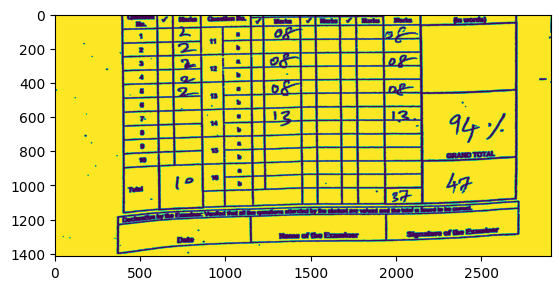

In [41]:
plt.imshow(img_final_bin)
cv2.imshow("sheet",img_final_bin)
cv2.waitKey(0)
cv2.destroyAllWindows()

Separating contours for the 2 marks in the table

In [42]:
idx = 0
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if ( 900 > x and y>50 and 160>w>140 and 80>h>60):
    
        print(w , h)
        idx += 1
        new_img = img[y:y+h, x:x+w]
        cv2.imwrite("images/sheet/digit/"+ str(idx)+ ' '+ str(w)+" "+str(h) + '.jpg', new_img)
        

        #plt.figure(figsize=(40, 10))
        #plt.subplot(5,2, 10)
        #plt.imshow(new_img, cmap='gray')
        #cv2.imshow("Current Crop", new_img)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
    else:
        print("Threshholding operation failed")
        

Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshho

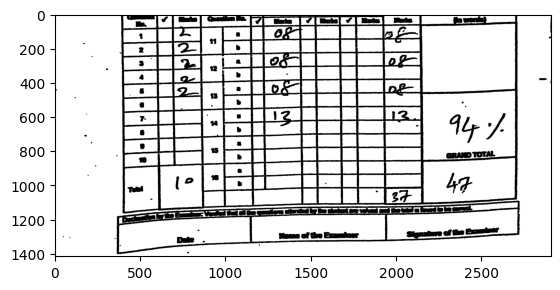

In [43]:
plt.imshow(img_final_bin, cmap='gray')

Separating contours for the 13 and 16 marks in the table

204 74
210 72
206 73
206 72
206 73
206 72
208 73
206 72
210 72
206 73
207 74
206 75


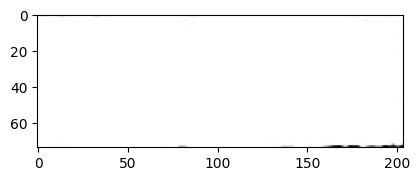

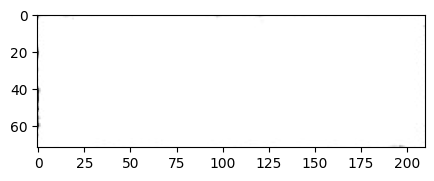

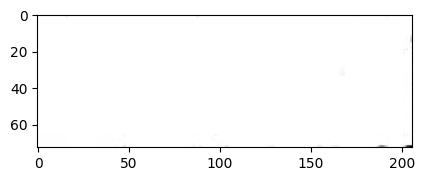

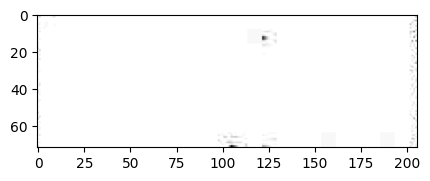

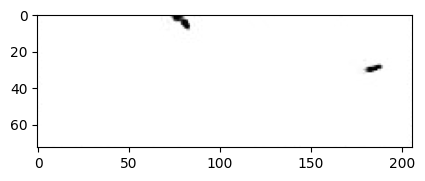

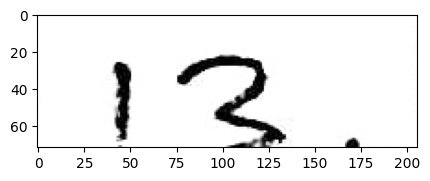

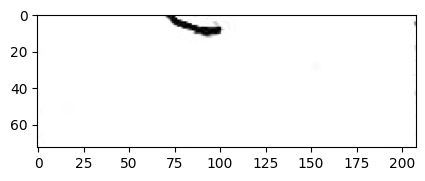

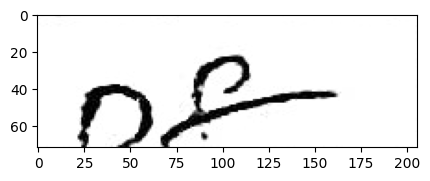

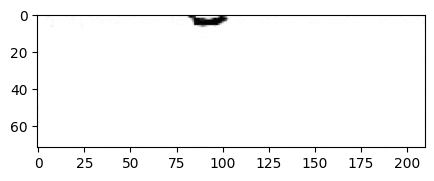

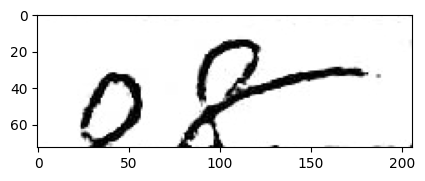

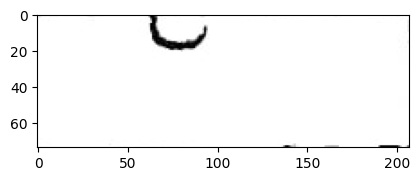

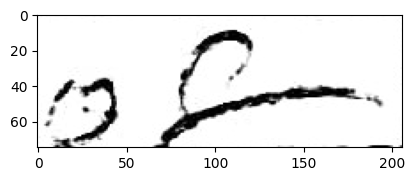

In [44]:
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if ( 1800 < x and y>50 and 250>w>180 and 80>h>60 ):
    
        print(w , h)
        idx += 1
        new_img = img[y:y+h, x:x+w]
        cv2.imwrite("images/sheet/digit/"+ str(idx)+ ' '+ str(w)+" "+str(h) + '.jpg', new_img)
        

        plt.figure(figsize=(40, 10))
        plt.subplot(5,2, 10)
        plt.imshow(new_img, cmap='gray')
        #cv2.imshow("Current Crop", new_img)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
    #else:
        #print("Threshholding operation failed")